<a href="https://colab.research.google.com/github/felipedick/Scripts/blob/main/Google_and_Bayer_Dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Understanding the database**
---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import percentileofscore
import numpy as np

In [ ]:
df = pd.read_csv('hotel_bookings.csv 1.zip', compression='zip')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

There are a lot of null values in "company". Since it is a hotel, it is common people don´t add this information in their reservation. For now, we will keep this column intact.
Agent: information might not be relevant for the tasks, for now we will keep the column and do not change any info.
Children: we will also keep this column intact for now.

In [ ]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


WE HAVE ADR SMALLER THAN 0, WHICH SEEMS STRANGE. WE WILL REMOVE ANY AMOUNTS SMALLER THAN ZERO

In [ ]:
df = df[df['adr']>0]
df['adr'].describe()

count    117430.000000
mean        103.530818
std          49.198721
min           0.260000
25%          70.530000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [ ]:
df['total_days'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

<ipython-input-65-152ac7a35ce2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_days'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']


In [ ]:
#Checking all columns and info
print(df.head().to_string())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies meal country market_segment distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled reserved_room_type assigned_room_type  booking_changes deposit_type  agent  company  days_in_waiting_list customer_type    adr  required_car_parking_spaces  total_of_special_requests reservation_status reservation_status_date  total_days
2  Resort Hotel            0          7               2015               July                        27                          1                        0                     1       1       0.0       0   BB     GBR         Direct               Direct                  0                       0                               0                  A                  C                0   No Deposit    NaN      NaN                     0 

In [ ]:
#Assigning month numbers
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12}
df['arrival_date_month_number'] = df['arrival_date_month'].map(month_map)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_days,arrival_date_month_number
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,7
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,7
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03,2,7


In [ ]:
#Gettig arrival date
df['arrival date complete'] = pd.to_datetime(df[['arrival_date_year',
                                                 'arrival_date_month_number',
                                                 'arrival_date_day_of_month']]
                                             .astype(str).agg('-'.join, axis=1))

In [ ]:
combination_counts = pd.crosstab(df['reservation_status'], df['is_canceled'])
combination_counts.head()

is_canceled,0,1
reservation_status,,
Canceled,0,42830
Check-Out,73419,0
No-Show,0,1181


"No show" is also considered as "canceled" in "is_canceled"

**TASK 1 - UNDERSTANDING THE SEASONALITY OF THE BOOKING**
---



To analyze seasonality, we will focus exclusively on "Check-out" and "No-show" reservations. This approach provides an accurate count of rooms that were effectively occupied on the specified dates. Including "Canceled" reservations could lead to inflated numbers that exceed the hotel's actual capacity, as canceled reservations allow for new customers to be booked in their place.

In [ ]:
#Removing canceled reservation
df_notcanceled = df[df['reservation_status']!='Canceled']

In [ ]:
#Grouping by year and month.Since database ranges from July 2015 to August 2017, we can not group only by month, we will inflate August and July and reduce the average for the other months
reservations_per_month = df_notcanceled.groupby(['arrival_date_year', 'arrival_date_month_number']).size().unstack()
reservations_per_month


arrival_date_month_number,1,2,3,4,5,6,7,8,9,10,11,12
arrival_date_year,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,1487.0,2219.0,2973.0,3136.0,1831.0,1877.0
2016,1681.0,2635.0,3342.0,3347.0,3522.0,3183.0,3055.0,3238.0,3353.0,3654.0,2777.0,2409.0
2017,2398.0,2832.0,3283.0,3178.0,3559.0,3194.0,3321.0,3116.0,NaN,NaN,NaN,NaN


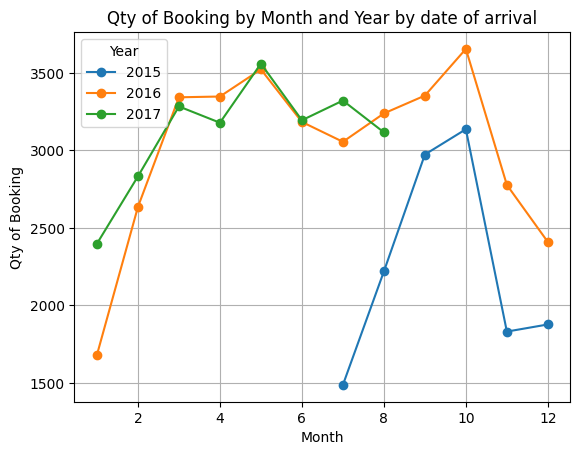

In [ ]:
reservations_per_month.T.plot(kind='line', marker='o')
plt.title('Qty of Booking by Month and Year by date of arrival')
plt.xlabel('Month')
plt.ylabel('Qty of Booking')
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [ ]:
#Calculating the average per month
average_reservations = reservations_per_month.mean()
average_reservations

arrival_date_month_number
1     2039.500000
2     2733.500000
3     3312.500000
4     3262.500000
5     3540.500000
6     3188.500000
7     2621.000000
8     2857.666667
9     3163.000000
10    3395.000000
11    2304.000000
12    2143.000000
dtype: float64

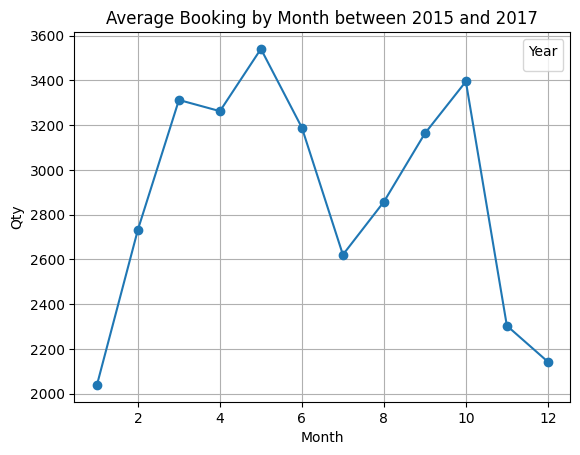

In [ ]:
#Plot reservations by month
average_reservations.plot(kind='line', marker='o')
plt.title('Average Booking by Month between 2015 and 2017')
plt.xlabel('Month')
plt.ylabel('Qty')
plt.legend(title='Year')
plt.grid(True)
plt.show()

PEAK MONTHS ARE MAY AND AFTER ARE OCTOBER, MARCH AND APRIL.
WE WILL ANALYZE PER DAY OF THE MONTH AND BY YEAR WEEK TO SEE WHICH WILL MAKE MORE SENSE

In [ ]:
#Grouping by day of the month
reservations_per_day = df_notcanceled['arrival_date_day_of_month'].value_counts().sort_index()
reservations_per_day

arrival_date_day_of_month
1     2180
2     2655
3     2290
4     2397
5     2599
6     2540
7     2182
8     2242
9     2517
10    2335
11    2381
12    2526
13    2428
14    2340
15    2494
16    2516
17    2510
18    2651
19    2570
20    2514
21    2407
22    2243
23    2420
24    2472
25    2722
26    2497
27    2357
28    2501
29    2306
30    2376
31    1432
Name: count, dtype: int64

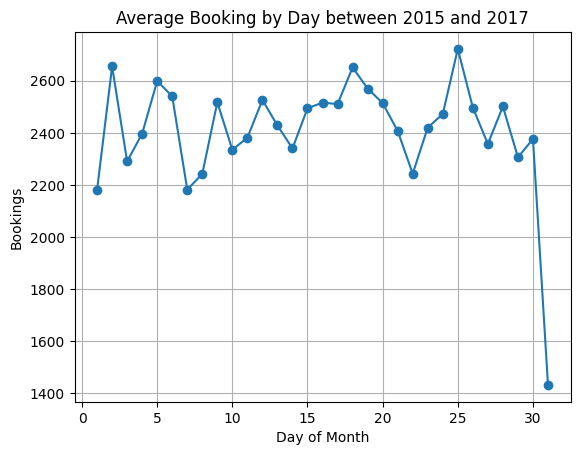

In [ ]:
#Plot by day
reservations_per_day.plot(kind='line', marker='o')
plt.title('Average Booking by Day between 2015 and 2017')
plt.xlabel('Day of Month')
plt.ylabel('Bookings')
plt.grid(True)
plt.show()

There is more variation by month than by day. Also organizing by day of the month will make the reservations more complex

In [ ]:
#Grouping by week of the year
reservations_per_week = df.groupby(['arrival_date_year', 'arrival_date_week_number']).size().unstack()
average_reservations_per_week = reservations_per_week.mean()
average_reservations_per_week

arrival_date_week_number
1      516.000000
2      596.000000
3      645.500000
4      727.000000
5      674.500000
6      741.000000
7     1032.000000
8     1092.500000
9     1038.000000
10    1058.000000
11    1021.000000
12    1024.000000
13    1188.500000
14    1117.500000
15    1328.000000
16    1186.500000
17    1389.000000
18    1447.500000
19    1180.500000
20    1372.500000
21    1395.500000
22    1258.000000
23    1293.500000
24    1233.500000
25    1320.000000
26    1181.500000
27     879.333333
28     938.000000
29     912.000000
30    1010.000000
31     904.000000
32     999.000000
33    1181.333333
34    1005.000000
35     850.333333
36    1068.000000
37    1094.000000
38    1312.500000
39    1270.000000
40    1182.000000
41    1321.000000
42    1345.000000
43    1151.500000
44    1115.000000
45     956.500000
46     767.000000
47     824.500000
48     730.500000
49     873.500000
50     706.000000
51     447.500000
52     583.500000
53     891.000000
dtype: float64

In [ ]:
reservations_per_day.describe()

count      31.000000
mean     2406.451613
std       226.246008
min      1432.000000
25%      2337.500000
50%      2428.000000
75%      2516.500000
max      2722.000000
Name: count, dtype: float64

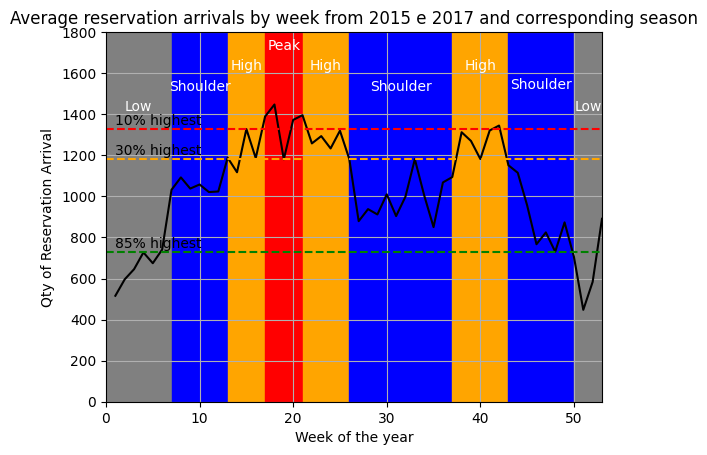

In [ ]:
average_reservations_per_week.plot(kind='line', color='k')
plt.title('Average reservation arrivals by week from 2015 e 2017 and corresponding season')

# Adding quartile lines: 15%, 70%, 90%
q90 = average_reservations_per_week.quantile(0.90)
q70 = average_reservations_per_week.quantile(0.70)
q15 = average_reservations_per_week.quantile(0.15)

#Adding quartile lines: 15%, 70%, 90%
plt.axhline(y=q90, color='r', linestyle='--')
plt.axhline(y=q15, color='g', linestyle='--')
plt.axhline(y=q70, color='orange', linestyle='--')

plt.text(1, q90 + 20, '10% highest', color='k', ha='left')
plt.text(1, q70 + 20, '30% highest', color='k', ha='left')
plt.text(1, q15 + 20, '85% highest', color='k', ha='left')

plt.axvspan(0, 7, color='gray')
plt.text(3.5, 1400, 'Low', ha='center', va='bottom', color='w')


plt.axvspan(7, 13, color='blue')
plt.text(10, 1500, 'Shoulder', ha='center', va='bottom', color='w')

plt.axvspan(13, 17, color='orange')
plt.text(15, 1600, 'High', ha='center', va='bottom', color='w')

plt.axvspan(17, 21, color='red')
plt.text(19, 1700, 'Peak', ha='center', va='bottom', color='w')

plt.axvspan(21, 26, color='orange')
plt.text(23.5, 1600, 'High', ha='center', va='bottom', color='w')

plt.axvspan(26, 37, color='blue')
plt.text(31.5, 1500, 'Shoulder', ha='center', va='bottom', color='w')

plt.axvspan(37, 43, color='orange')
plt.text(40, 1600, 'High', ha='center', va='bottom', color='w')

plt.axvspan(43, 50, color='blue')
plt.text(46.5,1500 + 10, 'Shoulder', ha='center', va='bottom', color='w')

plt.axvspan(50, 53, color='grey')
plt.text(51.5, 1400, 'Low', ha='center', va='bottom', color='w')

# Setting y-axis limit
plt.ylim(0, 1800)
plt.xlim(0, 53)
plt.xlabel('Week of the year')
plt.ylabel('Qty of Reservation Arrival')
plt.grid(True)
plt.show()

Peak season (red): 17 to 21 (5 weeks)
High Season (orange): 13 to 16, 22 to 26, 39 to 42(13 weeks)
Shoulder Season (blue): 7 to 12 and 27 to 38, 43 to 49 (25 weeks)
Low season (gray): 1 to 6 and 50 to 53 (10 weeks)



For a more detailed analysis and customized packages, each type of hotel could be analyzed separately to understand specific needs and plan accordingly


**TASK 2 - CREATING THE SHAPE OF THE FUTURES HOTEL PACKAGES**
---



For this analysis, we will focus exclusively on "Check-out" and "No-show" reservations since the goal is to have confirmed bookings and avoid cancelations. No show will be considered as a "confirmed booking" and the customer
These bookings provide a more realistic basis for analysis, as cancellations can be influenced for a number of factores including price.

In [ ]:
#Counting the frequency of days stayed in the hotel
frequencia_dias = df_notcanceled['total_days'].value_counts().sort_index()
frequencia_dias

total_days
1     15630
2     15346
3     15813
4     11113
5      5162
6      2357
7      5739
8       730
9       527
10      800
11      282
12      127
13       94
14      668
15       46
16       20
17       15
18        8
19        7
20        4
21       38
22       11
23        3
24        3
25       15
27        1
28       22
29        3
30        1
34        1
35        5
38        1
42        3
45        1
56        1
57        1
60        1
69        1
Name: count, dtype: int64

In [ ]:
frequencia_dias.describe()

count       38.000000
mean      1963.157895
std       4573.836124
min          1.000000
25%          3.000000
50%         15.000000
75%        632.750000
max      15813.000000
Name: count, dtype: float64

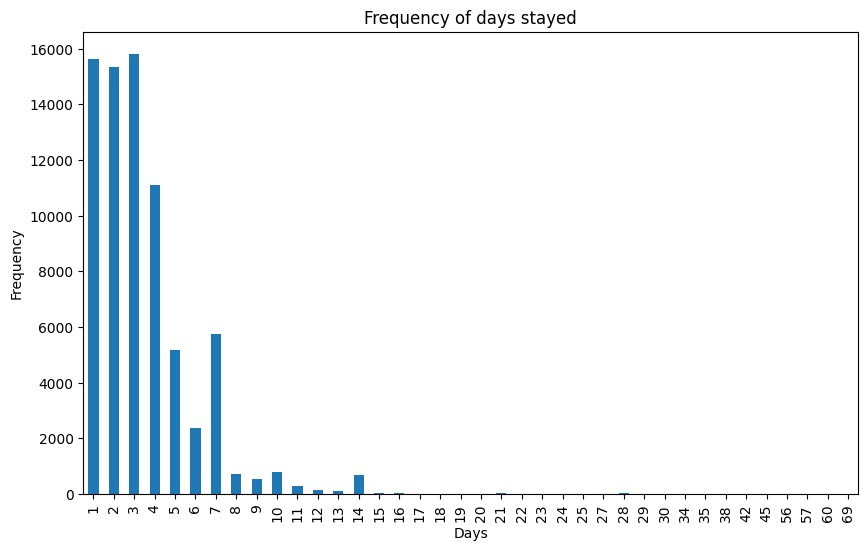

In [ ]:
#Bar chart of days stayed
plt.figure(figsize=(10, 6))
frequencia_dias.plot(kind='bar')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Frequency of days stayed')
plt.show()

We can see that total days stayed less than 14 are the most relevant.

In [ ]:
#Including average adr vs total days stayed as pricing could be one factor considered for packages.
adr_perdaystayed = df_notcanceled.groupby('total_days')['adr'].mean()
adr_perdaystayed

total_days
1      95.012495
2     103.144107
3     104.839135
4     103.522124
5     108.671124
6     115.587976
7     100.113032
8     108.584425
9     112.186471
10    102.530563
11    101.135745
12    103.929370
13    103.056064
14     89.002231
15     90.628478
16     95.448500
17     93.919333
18    103.828750
19     75.104286
20     85.650000
21     70.196842
22     81.255455
23    102.033333
24     92.523333
25     57.154000
27     93.010000
28     57.078636
29     92.953333
30    115.000000
34     93.000000
35     39.876000
38      0.260000
42     35.520000
45     42.110000
56     28.790000
57      8.340000
60    110.500000
69    110.000000
Name: adr, dtype: float64

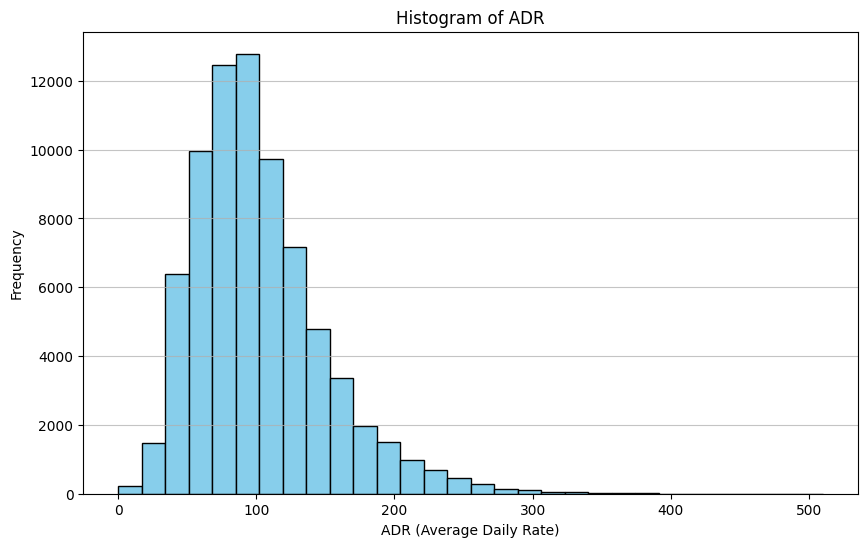

In [ ]:
#Plot of ADR
plt.figure(figsize=(10, 6))
plt.hist(df_notcanceled['adr'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('ADR (Average Daily Rate)')
plt.ylabel('Frequency')
plt.title('Histogram of ADR')
plt.grid(axis='y', alpha=0.75)
plt.show()

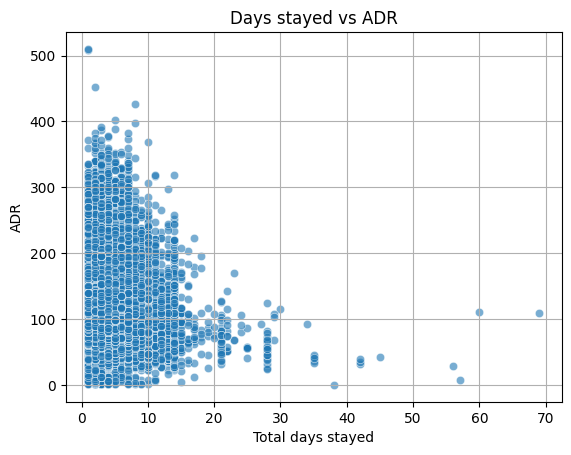

In [ ]:
#ADR VS Days stayed
plt.scatter(df_notcanceled['total_days'], df_notcanceled['adr'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.xlabel('Total days stayed')
plt.ylabel('ADR')
plt.title('Days stayed vs ADR')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

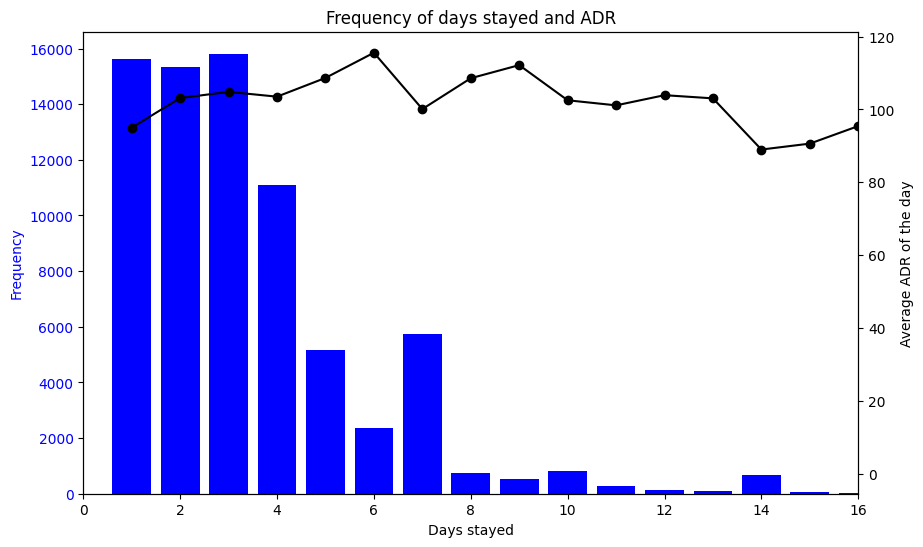

In [ ]:
#Plotting bar chart of ADR and days stayed until 16 days (which are the most relevant)

plt.figure(figsize=(10, 6))
fig, ax1 = plt.subplots(figsize=(10, 6))

#Primary axis (or Main axis)
ax1.bar(frequencia_dias.index, frequencia_dias.values, color='blue')
ax1.set_xlabel('Days stayed')
ax1.set_ylabel('Frequency', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

#Secondary axis
ax2 = ax1.twinx()
ax2.plot(adr_perdaystayed.index, adr_perdaystayed.values, color='k', marker='o')
ax2.set_ylabel('Average ADR of the day', color='k')
ax2.tick_params(axis='y', labelcolor='k')


plt.xlabel('Days stayed')

plt.title('Frequency of days stayed and ADR')
plt.xlim(0, 16)
plt.show()

In [ ]:
#Adding al data in one table
tabela_combinada = pd.concat([frequencia_dias, adr_perdaystayed], axis=1)
tabela_combinada.columns = ['Frequency', 'Average ADR']
tabela_combinada.head()


,Frequency,Average ADR
total_days,,
1,15630,95.012495
2,15346,103.144107
3,15813,104.839135
4,11113,103.522124
5,5162,108.671124


Scenarios

When it is not attractive to do a packaging
*   If Prices of D+1 are much higher than D+0 it does not make sense to do a packaging for D+1.
*   If Prices of D+1 are equal or lower than D+0 but stays of D+1 are more frequent than D+0, price is not a differential for the customer to increase 1 day. Example: prices of 7 days are significant lower than 6 but it is not attracting current 6-day-customer to make the change for 7 days.

When it is attractive to do a packaging
*   If Prices of D+1 are lower than D+0 and stays of D+1 are less frequent than D+0, a packaging might be interesting. Example: reduce price for 15 days might increase stays from 14 days to 15 days.
*  If Prices of D+1 are equal or slightly higher than D+0 and stays of D+1 are significantly less frequent than D+0, a package with reduced price might be interesting. Example: number of stays from 4 to 5 days and from 7 to 8 days. Example: reducing price for 5 days will initially decrease revenue for "current customers" but this might be mitigated with revenue increase for 1 day additional day from booking changes from 4 to 5 days.


Final Packages: 5, 9 and 15 days


**TASK 3 - COMPREHENDING THE CANCELLATION FOUNDATIONS**
---




For this, we will filter the database using only booking canceled information

In [ ]:
df_canceled=df[df['reservation_status']=='Canceled']

In [ ]:
#Understanding dates information
df_canceled[['reservation_status','reservation_status_date','arrival date complete']].sample(15)

,reservation_status,reservation_status_date,arrival date complete
58121,Canceled,2016-08-23,2016-10-06
11455,Canceled,2016-09-20,2017-05-09
6911,Canceled,2016-03-09,2016-07-11
67809,Canceled,2017-04-29,2017-05-07
59577,Canceled,2016-02-24,2016-10-29
57987,Canceled,2016-09-30,2016-10-04
65957,Canceled,2017-03-17,2017-04-11
52277,Canceled,2016-02-25,2016-06-02
51754,Canceled,2016-01-18,2016-05-24
14858,Canceled,2015-03-03,2015-09-26


In [ ]:
#Calculating "cancellation lead time" (time between the cancellation date and the originally expected arrival date).

df_canceled['arrival date complete'] = pd.to_datetime(df_canceled['arrival date complete'])
df_canceled['reservation_status_date'] = pd.to_datetime(df_canceled['reservation_status_date'])

df_canceled['leadtime cancelation'] = (df_canceled['arrival date complete'] - df_canceled['reservation_status_date']).dt.days

#Checking results
df_canceled[['reservation_status_date','arrival date complete', 'leadtime cancelation']].sample(15)

<ipython-input-90-42e4281d1fe5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canceled['arrival date complete'] = pd.to_datetime(df_canceled['arrival date complete'])
<ipython-input-90-42e4281d1fe5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canceled['reservation_status_date'] = pd.to_datetime(df_canceled['reservation_status_date'])
<ipython-input-90-42e4281d1fe5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,reservation_status_date,arrival date complete,leadtime cancelation
59136,2016-03-09,2016-10-21,226
57871,2016-08-24,2016-10-02,39
52898,2016-04-27,2016-06-14,48
68726,2017-04-25,2017-05-20,25
67476,2016-12-12,2017-05-04,143
55827,2016-07-30,2016-08-22,23
9992,2017-01-03,2017-02-03,31
11064,2017-01-27,2017-04-16,79
65636,2017-01-23,2017-04-06,73
49450,2015-10-21,2016-04-14,176


In [ ]:
#leadtime cancelation Statistics
df_canceled['leadtime cancelation'].describe()

count    42830.000000
mean        88.492926
std         90.763391
min          0.000000
25%         19.000000
50%         56.000000
75%        130.000000
max        526.000000
Name: leadtime cancelation, dtype: float64

In [ ]:
#Calculating frequency each leadtime appears
frequencia_daysofcanceling = df_canceled['leadtime cancelation'].value_counts().sort_index()
frequencia_daysofcanceling.head(10)

leadtime cancelation
0    815
1    611
2    479
3    707
4    578
5    596
6    633
7    597
8    494
9    455
Name: count, dtype: int64

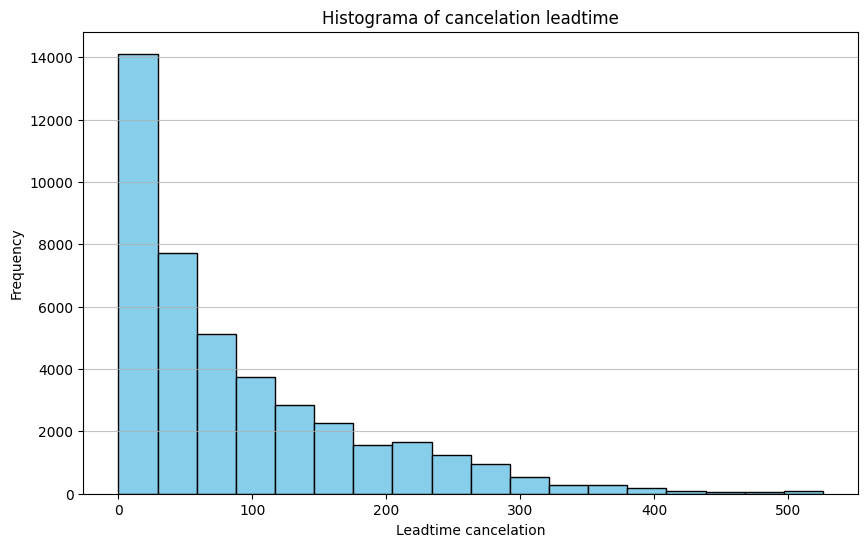

In [ ]:
#Plotting information. Since max cancelation is 526 days, if we divide in 18 bins, we will have cancelations approximately each 30 days
plt.figure(figsize=(10, 6))
plt.hist(df_canceled['leadtime cancelation'], bins=18, color='skyblue', edgecolor='black')
plt.xlabel('Leadtime cancelation')
plt.ylabel('Frequency')
plt.title('Histograma of cancelation leadtime')
plt.grid(axis='y', alpha=0.75)


"We will focus on cancellation lead times under 60 days, as these represent the most frequent 50% of cancellations. Shorter lead times make it increasingly difficult to find replacement bookings.

In [ ]:
#Filtering cancelation leadtime less than 60 days
df_canceled_60days = df_canceled[df_canceled['leadtime cancelation']<=60]
df_canceled_60days['leadtime cancelation'].describe()

count    22415.000000
mean        24.134642
std         17.562688
min          0.000000
25%          9.000000
50%         21.000000
75%         38.000000
max         60.000000
Name: leadtime cancelation, dtype: float64

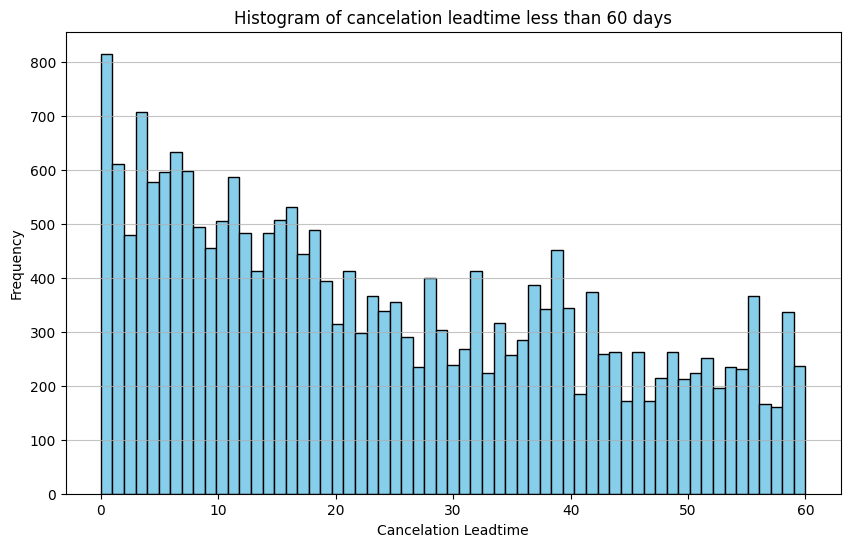

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_canceled_60days['leadtime cancelation'], bins=61, color='skyblue', edgecolor='black')
plt.xlabel('Cancelation Leadtime')
plt.ylabel('Frequency')
plt.title('Histogram of cancelation leadtime less than 60 days')
plt.grid(axis='y', alpha=0.75)

We see peaks at 0 day and 3 days


Cancelation Leadtimes and policy:
To simplify our policy, we will use multiples of 30 days for cancellation lead times, with the exception of the first penalty period, which will apply closer to the booked date.
This approach uses 30 days and 150 days as key reference points, aligning closely with the beginning of the first and third quarters.


In [ ]:
#Understanding percentile of 30 and 150 days
percentile_30 = percentileofscore(df_canceled['leadtime cancelation'],30, kind='rank')
percentile_150 = percentileofscore(df_canceled['leadtime cancelation'],150, kind='rank')
print(percentile_30, percentile_150 )

33.234882091991594 79.2727060471632


PROPOSAL POLICY: Cancelation leadtime vs penalty
1.   0 - 3 days: 90% (after 3 days, cancelations decrease)
2.   3 - 30 days: 75% (nearly 35% of all cancelations)
3.   31 - 60 days: 50% (nearly 50% of all cancelations)
4.   61 - 150 days: 25% (nearly 80% of all cancelation)
5.   151 days or more : 0%




**TASK4 - PREPARING THE IT SYSTEMS FOR THE DEMAND**
---



We will utilize both canceled and confirmed booking data for this task, as both require IT resources.

In [ ]:
#Calculation of booking date
df['booking date'] = df['arrival date complete'] - pd.to_timedelta(df['lead_time'], unit='d')
df[['lead_time','arrival date complete','booking date']].head()

,lead_time,arrival date complete,booking date
2,7,2015-07-01,2015-06-24
3,13,2015-07-01,2015-06-18
4,14,2015-07-01,2015-06-17
5,14,2015-07-01,2015-06-17
6,0,2015-07-01,2015-07-01


In [ ]:
df[['lead_time','arrival date complete','booking date']].describe()

,lead_time,arrival date complete,booking date
count,117430.000000,117430,117430
mean,105.084340,2016-08-29 20:41:18.521672448,2016-05-16 18:39:51.579664640
min,0.000000,2015-07-01 00:00:00,2014-03-18 00:00:00
25%,19.000000,2016-03-16 00:00:00,2015-11-28 00:00:00
50%,71.000000,2016-09-08 00:00:00,2016-05-05 00:00:00
75%,162.000000,2017-03-20 00:00:00,2016-12-09 00:00:00
max,709.000000,2017-08-31 00:00:00,2017-08-31 00:00:00
std,106.907012,NaN,NaN


<Figure size 1000x600 with 0 Axes>

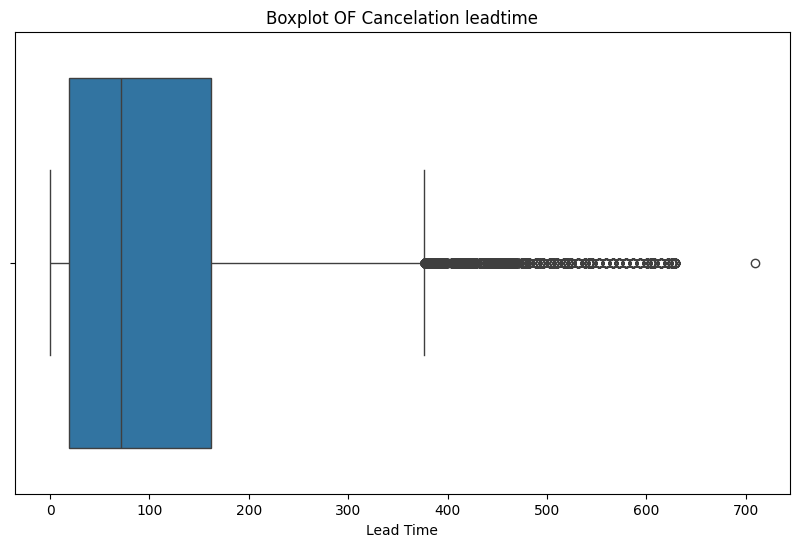

In [ ]:
#Plotting boxplot for leadtime

plt.figure(figsize=(10, 6))


plt.figure(figsize=(10, 6))
box = sns.boxplot(x=df['lead_time'])

Q1 = np.percentile(df['lead_time'], 25)
Q2 = np.percentile(df['lead_time'], 50)
Q3 = np.percentile(df['lead_time'], 75)
IQR = Q3 - Q1
whisker_high_point = Q3 + 1.5 * IQR


plt.title('Boxplot OF Cancelation leadtime')
plt.xlabel('Lead Time')
plt.show()

In [ ]:
#We see a few outliers, so we will check which percentil whisker_high will
percentile_whisker = percentileofscore(df['lead_time'],whisker_high_point, kind='rank')
print(percentile_whisker)

97.47934939964233


In [ ]:
max_booking_date = df['arrival date complete'].max() - pd.to_timedelta(whisker_high_point, unit='d')
print(max_booking_date)

2016-08-19 12:00:00


Our data only includes arrival dates from July 1, 2015, to August 31, 2017. However, booking dates can extend beyond this range. For instance, we have bookings as early as June 24, 2013, indicating that bookings made in 2013 and 2014 with arrivals before 2015 might be missing. Similarly, bookings made in 2017 for arrivals in 2018 are also likely absent.
To address this data gap, we'll filter our analysis based on a calculated range of booking dates.

*   Start Date: July 1, 2015 (matching the earliest arrival date).
*   End Date: July 31, 2016. We've determined that 95% of bookings have a lead time of 373 days or less. This means there's a high probability that bookings made within 373 days before the latest arrival date (August 31, 2017), which is August 23, 2016, are included in our data. Bookings with longer lead times are considered outliers and will have minimal impact on our analysis. To ensure we have full months, we'll use July 31, 2016, as our end date.





In [ ]:
#Filtering the dates above
date_filter = (df['booking date']>'2015-07-01') & (df['booking date']<='2016-07-31')
df_booking_filter = df[date_filter]

In [ ]:
combination_counts = pd.crosstab(df_booking_filter['reservation_status'], df_booking_filter['is_canceled'])
combination_counts.head()

is_canceled,0,1
reservation_status,,
Canceled,0,21004
Check-Out,37808,0
No-Show,0,689


In [ ]:
df_booking_filter.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_days,arrival_date_month_number,arrival date complete,booking date
56,Resort Hotel,0,0,2015,July,27,2,0,1,2,...,Transient,147.0,0,0,Check-Out,2015-07-03,1,7,2015-07-02,2015-07-02
57,Resort Hotel,0,0,2015,July,27,2,0,1,2,...,Transient,117.9,0,2,Check-Out,2015-07-03,1,7,2015-07-02,2015-07-02
58,Resort Hotel,0,0,2015,July,27,2,0,1,2,...,Transient,123.0,0,0,Check-Out,2015-07-03,1,7,2015-07-02,2015-07-02
90,Resort Hotel,0,1,2015,July,27,3,0,1,2,...,Transient,131.0,0,1,Check-Out,2015-07-04,1,7,2015-07-03,2015-07-02
119,Resort Hotel,0,2,2015,July,27,4,0,1,2,...,Transient,163.0,1,0,Check-Out,2015-07-05,1,7,2015-07-04,2015-07-02


In [ ]:
df_booking_filter['booking date'].describe()

count                            59501
mean     2016-01-11 20:21:50.983008768
min                2015-07-02 00:00:00
25%                2015-10-19 00:00:00
50%                2016-01-19 00:00:00
75%                2016-04-01 00:00:00
max                2016-07-31 00:00:00
Name: booking date, dtype: object

In [ ]:
# Adding booking month and year
df_booking_filter['booking_month_year'] = df_booking_filter['booking date'].dt.to_period('M')
df_booking_filter[['booking date','booking_month_year']].head()


<ipython-input-106-85ab5abb988c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_booking_filter['booking_month_year'] = df_booking_filter['booking date'].dt.to_period('M')


,booking date,booking_month_year
56,2015-07-02,2015-07
57,2015-07-02,2015-07
58,2015-07-02,2015-07
90,2015-07-02,2015-07
119,2015-07-02,2015-07


<Axes: xlabel='booking_month_year'>

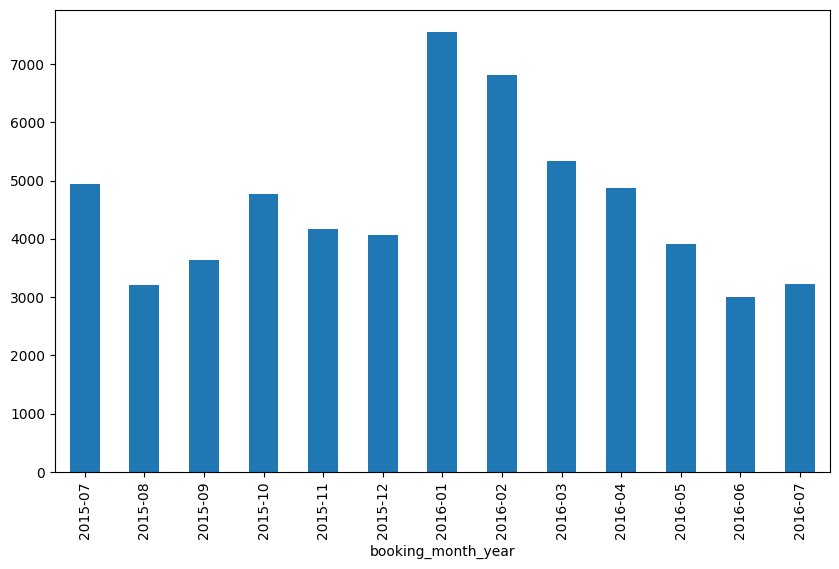

In [ ]:
# Calcular a frequência de datas por mês e ano
frequencia_mensal = df_booking_filter['booking_month_year'].value_counts().sort_index()

# Criar o gráfico de barras
frequencia_mensal.plot(kind='bar', figsize=(10, 6))

In [ ]:
#Adding booking week
df_booking_filter['week_of_year_booking'] = df_booking_filter['booking date'].dt.isocalendar().week
df_booking_filter[['booking date', 'week_of_year_booking']].sample(10)

<ipython-input-108-15361184a7e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_booking_filter['week_of_year_booking'] = df_booking_filter['booking date'].dt.isocalendar().week


,booking date,week_of_year_booking
20003,2016-01-12,2
98713,2016-03-28,13
86499,2016-01-27,4
52117,2016-02-08,6
81923,2015-11-07,45
14422,2015-10-03,40
80718,2015-10-19,43
67918,2016-07-08,27
42710,2015-09-08,37
66434,2016-07-11,28


In [ ]:
#Adding booking year and month in separate columns
df_booking_filter['booking_year'] = df_booking_filter['booking date'].dt.to_period('y')
df_booking_filter['booking_month'] = df_booking_filter['booking date'].dt.month
df_booking_filter.head()

<ipython-input-109-babe1c018af3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_booking_filter['booking_year'] = df_booking_filter['booking date'].dt.to_period('y')
<ipython-input-109-babe1c018af3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_booking_filter['booking_month'] = df_booking_filter['booking date'].dt.month


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,total_days,arrival_date_month_number,arrival date complete,booking date,booking_month_year,week_of_year_booking,booking_year,booking_month
56,Resort Hotel,0,0,2015,July,27,2,0,1,2,...,Check-Out,2015-07-03,1,7,2015-07-02,2015-07-02,2015-07,27,2015,7
57,Resort Hotel,0,0,2015,July,27,2,0,1,2,...,Check-Out,2015-07-03,1,7,2015-07-02,2015-07-02,2015-07,27,2015,7
58,Resort Hotel,0,0,2015,July,27,2,0,1,2,...,Check-Out,2015-07-03,1,7,2015-07-02,2015-07-02,2015-07,27,2015,7
90,Resort Hotel,0,1,2015,July,27,3,0,1,2,...,Check-Out,2015-07-04,1,7,2015-07-03,2015-07-02,2015-07,27,2015,7
119,Resort Hotel,0,2,2015,July,27,4,0,1,2,...,Check-Out,2015-07-05,1,7,2015-07-04,2015-07-02,2015-07,27,2015,7


In [ ]:
# Adjust the year to account for cases where the first days of January were part of the previous year's final week and checking results.
df_booking_filter.loc[(df_booking_filter['booking_month'] == 1) & (df_booking_filter['week_of_year_booking'] > 50), 'booking_year'] -= 1
filtro_2 = (df_booking_filter['booking_year']=='2015') & (df_booking_filter['week_of_year_booking']>52)
test = df_booking_filter[filtro_2]
test[['booking_year', 'booking date','booking_month','week_of_year_booking']].sample(10)


,booking_year,booking date,booking_month,week_of_year_booking
49226,2015,2016-01-01,1,53
54757,2015,2016-01-01,1,53
46533,2015,2016-01-02,1,53
53382,2015,2015-12-29,12,53
83102,2015,2015-12-29,12,53
54928,2015,2016-01-01,1,53
49867,2015,2016-01-01,1,53
54660,2015,2015-12-30,12,53
48052,2015,2016-01-02,1,53
46348,2015,2015-12-29,12,53


In [ ]:
#Grouping by year and week of the year
booking_per_week = df_booking_filter.groupby(['booking_year', 'week_of_year_booking']).size().unstack()
booking_per_week

week_of_year_booking,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
booking_year,,,,,,,,,,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,762.0,1594.0,824.0,686.0,855.0,942.0,1180.0,973.0,765.0,856.0
2016,2066.0,1803.0,1836.0,1390.0,1804.0,1737.0,1420.0,1577.0,1290.0,1125.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
average_booking_per_week = booking_per_week.mean()
average_booking_per_week

week_of_year_booking
1     2066.0
2     1803.0
3     1836.0
4     1390.0
5     1804.0
6     1737.0
7     1420.0
8     1577.0
9     1290.0
10    1125.0
11    1289.0
12    1264.0
13    1015.0
14    1234.0
15    1536.0
16    1082.0
17     754.0
18     812.0
19     795.0
20     981.0
21    1008.0
22     646.0
23     675.0
24     732.0
25     745.0
26     660.0
27     708.0
28    1657.5
29     649.0
30     777.0
31     361.0
32     782.0
33     783.0
34     947.0
35     532.0
36     829.0
37     850.0
38     981.0
39     658.0
40    1504.0
41     570.0
42    1428.0
43     980.0
44     762.0
45    1594.0
46     824.0
47     686.0
48     855.0
49     942.0
50    1180.0
51     973.0
52     765.0
53     856.0
dtype: float64

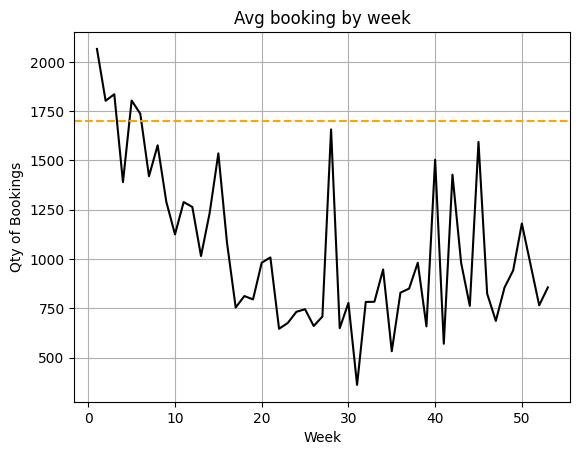

In [ ]:
#Plotting by week of the year
average_booking_per_week.plot(kind='line', color='k')
plt.title('Avg booking by week')
plt.xlabel('Week')
plt.xlabel('Week')
plt.ylabel('Qty of Bookings')
plt.axhline(y=1700, color='orange', linestyle='--') #Line for reference
plt.grid(True)
plt.show()

Our data reveals significant peaks in bookings during the first six weeks of the year with a maximum of 2,066 bookings observed at the highest point (first week).